## **Training a simple digit classifier using CNN on MNIST dataset in Tensorflow Keras**

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM
%matplotlib inline

In [2]:
# Loading Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

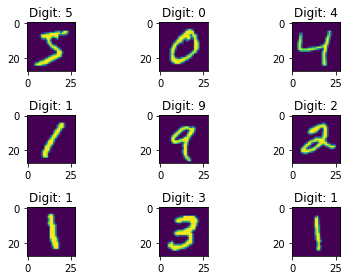

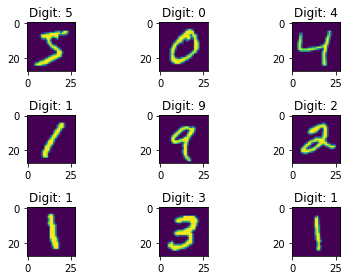

In [3]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i])
  plt.title("Digit: {}".format(y_train[i]))
fig

Figure(432x288)


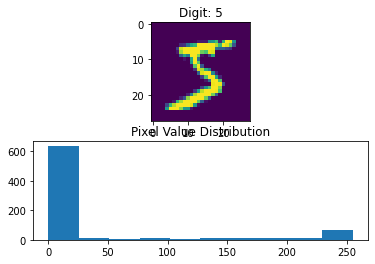

In [4]:
#graphing distribution of pixel values
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0])
plt.title("Digit: {}".format(y_train[0]))
plt.subplot(2,1,2)
plt.hist(x_train[0].reshape(784))
plt.title("Pixel Value Distribution")
print(fig)

The pixel values range from 0 to 255

In [5]:
#normalizing the data to the scale of 0-1, this will enhance the speed
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [6]:
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
#Taking inputs for layers  building the model
ip = KL.Input(shape=(28,28,1))
conv = KL.Conv2D(32, (3,3), padding="valid", activation=tf.nn.relu)(ip)
mx = KL.MaxPool2D((2,2),(2,2))(conv)
dp = KL.Dropout(0.5)(mx) #enhance the efficiency 
conv = KL.Conv2D(64, (3,3), padding="valid", activation=tf.nn.relu)(dp)
mx = KL.MaxPool2D((2,2),(2,2))(conv)
dp = KL.Dropout(0.5)(mx)
conv = KL.Conv2D(128, (3,3), padding="valid", activation=tf.nn.relu)(dp)
fl = KL.Flatten()(conv)
op = KL.Dense(10, activation=tf.nn.softmax)(fl)

model = KM.Model(ip,op)
model.summary()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test,y_test)
print("Test Loss: {0} \n Test Accuracy: {1}".format(test_loss, test_acc))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0     

Our Test Accuracy is approximately 99%